# Part I - Exploring riding made in a bike-sharing system

## by Evgeniy Kuryan

## Introduction
> Introduce the dataset

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
>
>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df_original = pd.read_csv('201902-fordgobike-tripdata.csv')
df = df_original.copy() #let's make copy of original data
df.shape #let's check shape of our data set

(183412, 16)

In [3]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

Let's transform data to make it easier to work with it.
Start and end time should be transformed to datetime objects, also I should add columns with a day of week

In [7]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_day'] = df.start_time.dt.day_name()
df['end_time'] = pd.to_datetime(df['end_time'])
df['end_day'] = df.end_time.dt.day_name()
df.end_day = df.end_day.astype('category')
df.start_day = df.start_day.astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [9]:
df[df.start_station_id.isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,end_day
475,1709,2019-02-28 20:55:53.932,2019-02-28 21:24:23.738,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No,Thursday,Thursday
1733,1272,2019-02-28 18:32:34.273,2019-02-28 18:53:46.727,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No,Thursday,Thursday
3625,142,2019-02-28 17:10:46.529,2019-02-28 17:13:09.431,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No,Thursday,Thursday
4070,585,2019-02-28 16:28:45.934,2019-02-28 16:38:31.332,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes,Thursday,Thursday
5654,509,2019-02-28 12:30:17.131,2019-02-28 12:38:46.329,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes,Thursday,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176154,1447,2019-02-02 12:03:04.544,2019-02-02 12:27:12.267,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984.0,Male,No,Saturday,Saturday
179730,309,2019-02-01 12:59:45.969,2019-02-01 13:04:55.426,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987.0,Female,No,Friday,Friday
179970,659,2019-02-01 12:17:37.675,2019-02-01 12:28:37.014,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No,Friday,Friday
180106,2013,2019-02-01 11:33:55.147,2019-02-01 12:07:28.940,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No,Friday,Friday


Let's check what we should do with NaN values in start and end station Id.

In [10]:
for each in df.columns:
    print(each, df[each].nunique())

duration_sec 4752
start_time 183401
end_time 183397
start_station_id 329
start_station_name 329
start_station_latitude 334
start_station_longitude 335
end_station_id 329
end_station_name 329
end_station_latitude 335
end_station_longitude 335
bike_id 4646
user_type 2
member_birth_year 75
member_gender 3
bike_share_for_all_trip 2
start_day 7
end_day 7


Maybe we could use start and end station longitude instead of id?

In [11]:
[long for long in df.start_station_longitude.unique() if df[df.start_station_longitude == long]['start_station_id'].nunique()>1]

[]

In [12]:
[long for long in df.end_station_longitude.unique() if df[df.end_station_latitude == long]['end_station_id'].nunique()>1]

[]

In [13]:
list1 = list(df.end_station_id.value_counts().index)
list1

[67.0,
 58.0,
 21.0,
 15.0,
 3.0,
 30.0,
 81.0,
 6.0,
 5.0,
 16.0,
 22.0,
 44.0,
 239.0,
 27.0,
 50.0,
 66.0,
 17.0,
 93.0,
 90.0,
 23.0,
 182.0,
 19.0,
 245.0,
 114.0,
 350.0,
 36.0,
 61.0,
 126.0,
 104.0,
 24.0,
 74.0,
 89.0,
 243.0,
 176.0,
 321.0,
 223.0,
 324.0,
 60.0,
 43.0,
 256.0,
 371.0,
 20.0,
 88.0,
 80.0,
 130.0,
 11.0,
 134.0,
 109.0,
 343.0,
 59.0,
 10.0,
 86.0,
 28.0,
 64.0,
 296.0,
 112.0,
 310.0,
 349.0,
 47.0,
 323.0,
 14.0,
 284.0,
 77.0,
 160.0,
 364.0,
 92.0,
 266.0,
 49.0,
 241.0,
 78.0,
 377.0,
 62.0,
 26.0,
 200.0,
 121.0,
 355.0,
 129.0,
 25.0,
 9.0,
 368.0,
 7.0,
 139.0,
 238.0,
 13.0,
 345.0,
 42.0,
 363.0,
 197.0,
 8.0,
 75.0,
 79.0,
 196.0,
 133.0,
 98.0,
 181.0,
 116.0,
 100.0,
 280.0,
 101.0,
 122.0,
 76.0,
 247.0,
 370.0,
 115.0,
 123.0,
 70.0,
 141.0,
 246.0,
 127.0,
 73.0,
 240.0,
 356.0,
 171.0,
 41.0,
 4.0,
 285.0,
 124.0,
 102.0,
 258.0,
 125.0,
 195.0,
 163.0,
 120.0,
 72.0,
 95.0,
 53.0,
 108.0,
 252.0,
 183.0,
 85.0,
 144.0,
 369.0,
 248.0,
 269.

In [14]:
list1.sort()

In [15]:
list1

[3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 39.0,
 41.0,
 42.0,
 43.0,
 44.0,
 46.0,
 47.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 66.0,
 67.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 136.0,
 137.0,
 138.0,
 139.0,
 140.0,
 141.0,
 142.0,
 144.0,
 145.0,
 146.0,
 147.0,
 148.0,
 149.0,
 150.0,
 151.0,
 152.0,
 153.0,
 154.0,
 155.0,
 156.0,
 157.0,
 15

Answer - yes, we could use longitude of station instead of id in this data set.

### What is the structure of your dataset?

The original dataset has 183412 rows and 16 columns, with information about the duration of renting a bike (in a sec), start and end time of renting,  start and end station/location name/id, bike id, and user information.

### What is/are the main feature(s) of interest in your dataset?

In first look most interesting features are: start/end time and location, bike id, user type

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

All features was listed in previous paragraph


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


Lets make a brief look at distribution of our variables.

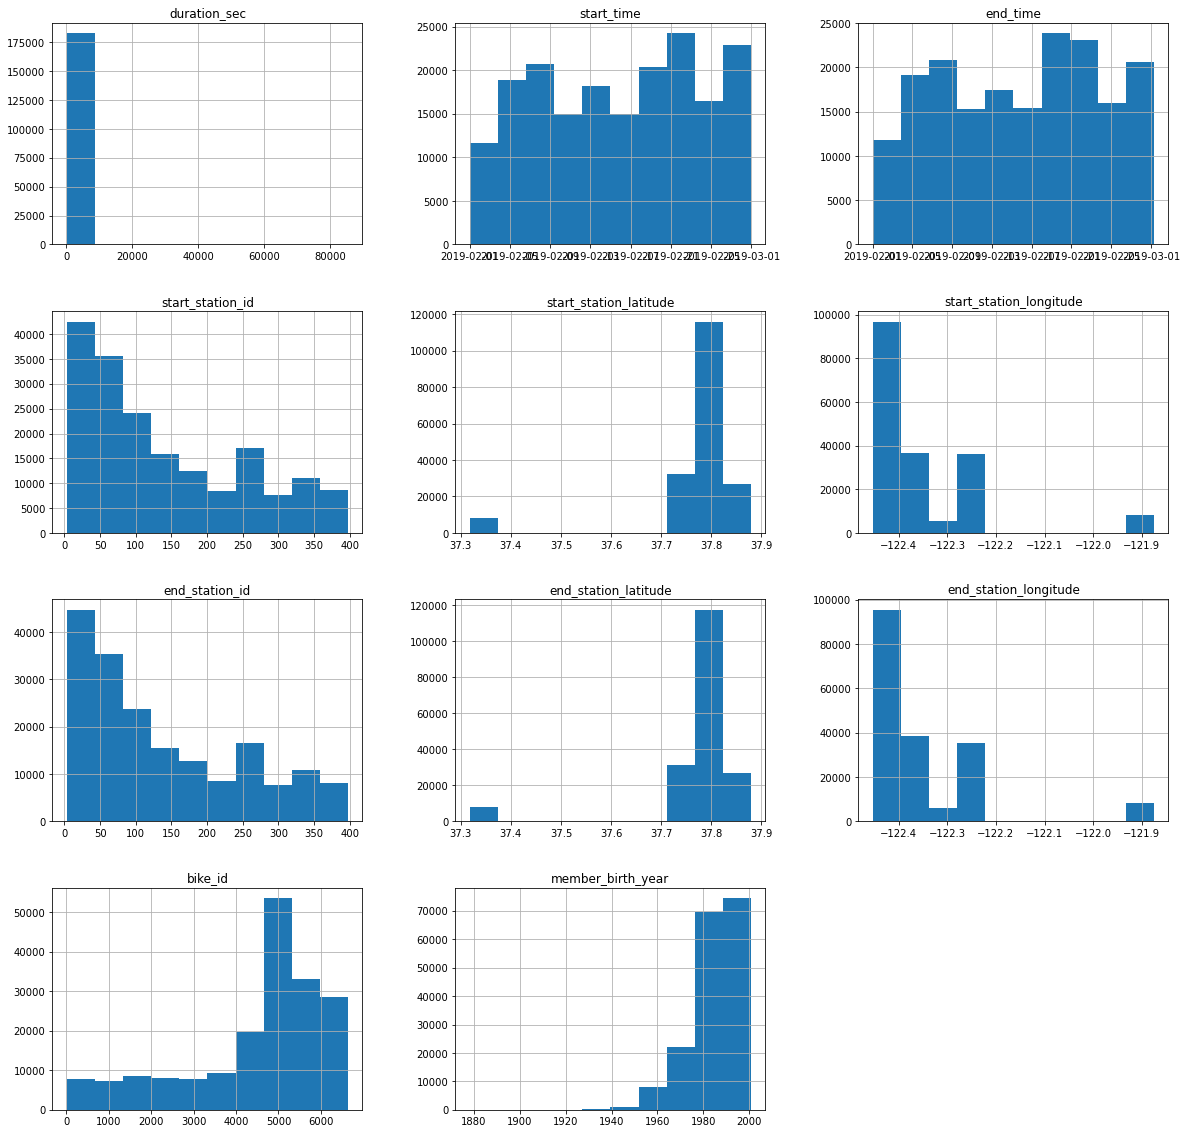

In [16]:
df.hist(figsize=(20,20));

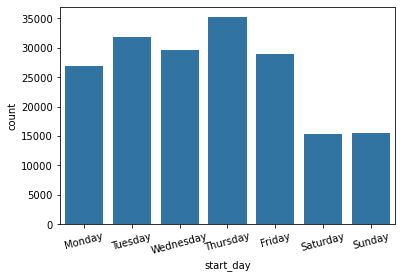

In [17]:
color = sns.color_palette()[0]
order = ['Monday',  'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data = df,x='start_day', order = order,color = color);
plt.xticks(rotation = 15);

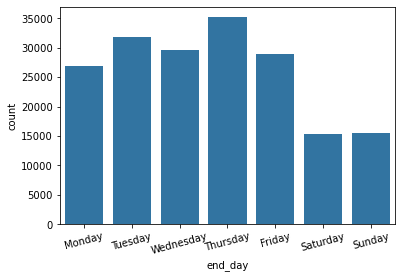

In [18]:
sns.countplot(data = df,x='end_day', order = order,color = color);
plt.xticks(rotation = 15);

Interesting observation's: we have big outliers in 'duration_sec' variable, member_birth_year.
Also interesting observation that most part of bikes was rented in area that stays in latitude 37.7 - 37.9, and longitude -122.4 - -122.2. This information need further inspection.
For me was unexpected that most bike's was rented in weekday's, not in weekend's.

Let's look deeper at variables with outliers

In [19]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


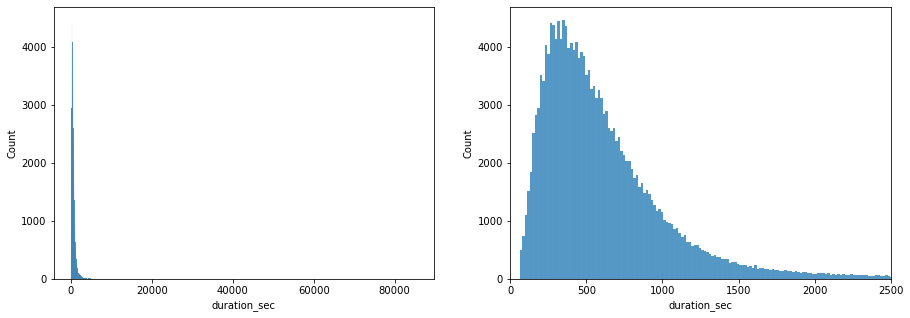

In [52]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data = df,x='duration_sec',color = color);

plt.subplot(1,2,2)
sns.histplot(data = df,x='duration_sec',color = color);
plt.xlim(0,2500);

In cause that we have long tale let's make log transform

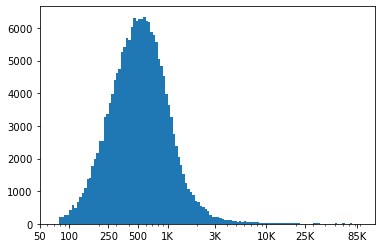

In [58]:
bins = 10** np.arange(1.9,np.log10(df.duration_sec).max() +0.025,0.025)
plt.hist(data = df,x='duration_sec', bins = bins);
plt.xscale('log');
ticks = [50,100,250,500,1000,3000,10000,25000,85000]
labels = [str(x) if x<1000 else '{0:.0f}K'.format(x/1000) for x in ticks]
plt.xticks(ticks,labels);


Let's look deeper in birth year of our subscribers

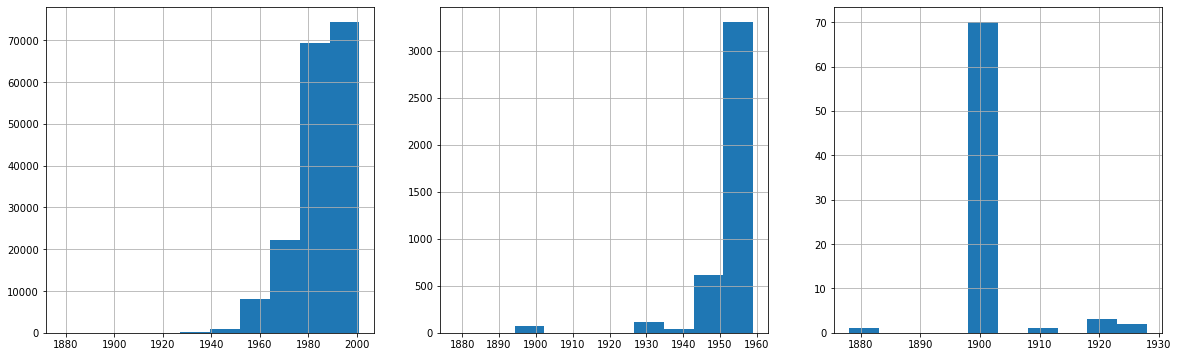

In [61]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
df.member_birth_year.hist()

plt.subplot(1,3,2)
df[df.member_birth_year <1960].member_birth_year.hist();

plt.subplot(1,3,3)
df[df.member_birth_year <1930].member_birth_year.hist();

I think there are errors in the dates of birth before 1930, but I'm not entirely sure about the years in the range from 1920 to 1930 (maybe there are some strong old people riding bicycles, or maybe their children use parent's accounts). But I am absolutely sure that the records with the years of birth in the range from 1880 to 1920 were not created correctly.
Let's replace incorrect years of birth with NaN values

In [74]:
df.loc[df['member_birth_year'] <1921,['member_birth_year']] = np.NaN

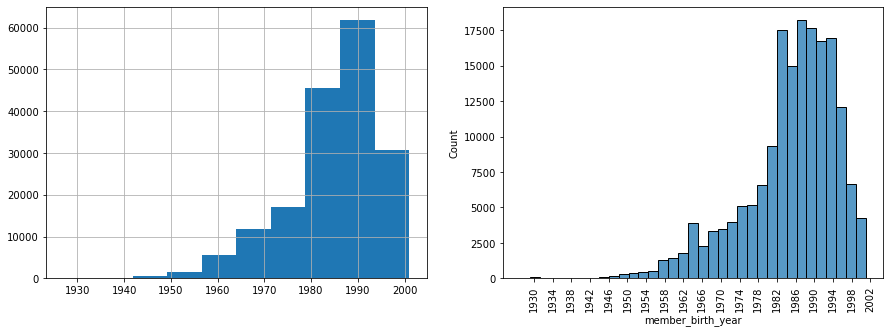

In [86]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df.member_birth_year.hist()

plt.subplot(1,2,2)
sns.histplot(data = df, x = 'member_birth_year',bins = 35);
plt.xticks(np.arange(1930,2005,4),rotation = 90);



In [84]:
df.member_birth_year.describe()

count    175072.000000
mean       1984.842333
std           9.968551
min        1927.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

As we see in plot, most of our subscribers are born around 1984-1994 years

Let's make deeper look at location where bike was rented:

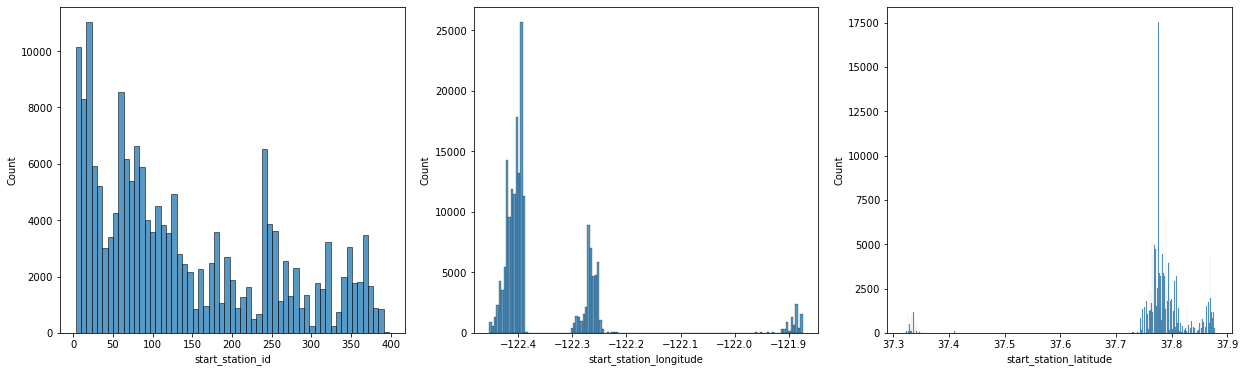

In [107]:
plt.figure(figsize=(21,6))
plt.subplot(1,3,1)
sns.histplot(data = df, x = 'start_station_id');

plt.subplot(1,3,2)
sns.histplot(data = df, x = 'start_station_longitude');

plt.subplot(1,3,3)
sns.histplot(data = df, x = 'start_station_latitude');


In [106]:
b = df[df.start_station_longitude < -122.2]['start_station_id'].nunique() #how much stations we have in longitude lower then -122.2
c = df['start_station_id'].nunique() #how much station we have at all
print ('We have {} station that longitude lower then -122.2, there {} station at all. So {}% of stations stays in this area'.format(b,c,"{0:.1f}".format(b/c*100)))

We have 283 station that longitude lower then -122.2, there 329 station at all. So 86.0% of stations stays in this area


I think we have same distribution in end station's but let's check for sure

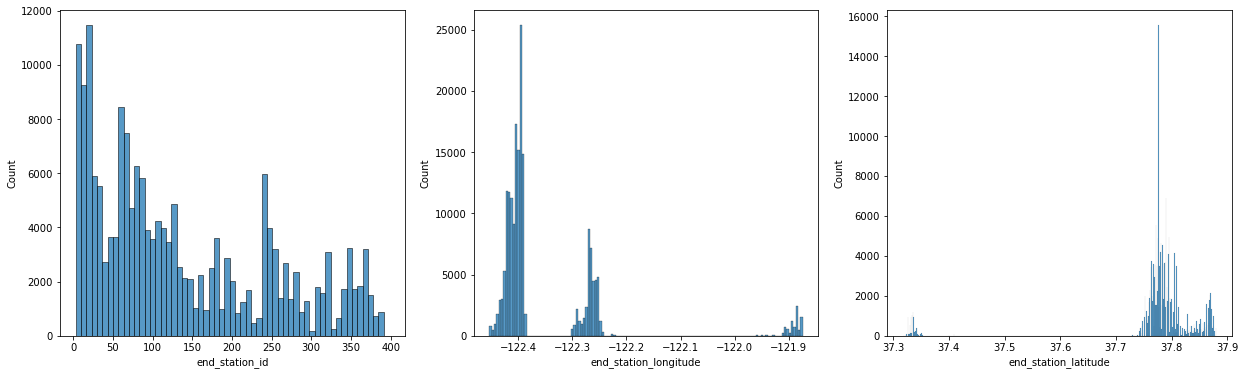

In [108]:
plt.figure(figsize=(21,6))
plt.subplot(1,3,1)
sns.histplot(data = df, x = 'end_station_id');

plt.subplot(1,3,2)
sns.histplot(data = df, x = 'end_station_longitude');

plt.subplot(1,3,3)
sns.histplot(data = df, x = 'end_station_latitude');



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

